# **License Plate Detection Project Using YOLO**

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.8 MB/s eta 0:00:00


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d andrewmvd/car-plate-detection

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/car-plate-detection
License(s): CC0-1.0
100% 203M/203M [00:00<00:00, 739MB/s] 
100% 203M/203M [00:00<00:00, 774MB/s]


In [4]:
!unzip /content/car-plate-detection.zip

Archive:  /content/car-plate-detection.zip
  inflating: annotations/Cars0.xml   
  inflating: annotations/Cars1.xml   
  inflating: annotations/Cars10.xml  
  inflating: annotations/Cars100.xml  
  inflating: annotations/Cars101.xml  
  inflating: annotations/Cars102.xml  
  inflating: annotations/Cars103.xml  
  inflating: annotations/Cars104.xml  
  inflating: annotations/Cars105.xml  
  inflating: annotations/Cars106.xml  
  inflating: annotations/Cars107.xml  
  inflating: annotations/Cars108.xml  
  inflating: annotations/Cars109.xml  
  inflating: annotations/Cars11.xml  
  inflating: annotations/Cars110.xml  
  inflating: annotations/Cars111.xml  
  inflating: annotations/Cars112.xml  
  inflating: annotations/Cars113.xml  
  inflating: annotations/Cars114.xml  
  inflating: annotations/Cars115.xml  
  inflating: annotations/Cars116.xml  
  inflating: annotations/Cars117.xml  
  inflating: annotations/Cars118.xml  
  inflating: annotations/Cars119.xml  
  inflating: annotations/

In [5]:
import os
import shutil # for move the file
import re
import xml.etree.ElementTree as xet # for xml annotations
import pandas as pd
import cv2 # computer vision
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [6]:
os.makedirs("License_Plate_Detector",exist_ok=True) # make the folder

In [7]:
shutil.move("annotations","License_Plate_Detector/annotations") # move annotation folder to our folder that is license plate detector
shutil.move("images",'License_Plate_Detector/images') # move images folder to our folder that is license plate detector

'License_Plate_Detector/images'

In [8]:
dataset_path = '/content/License_Plate_Detector' # base dir path

In [9]:
def extract_number(filename):
  """
  This function will returns the value that is in the image name

  ex: file name : img123  -> this function will return 123
  ex: file name : img  -> this function will return 0
  """
  match = re.search(r'(\d+)',filename) # scearch the digit in the image name
  if match:
    return int(match.group(0)) # return the all the digit
  else:
    return 0

In [10]:
labels_dict = dict(
    img_path = [],
    xmin = [],
    xmax = [],
    ymin = [],
    ymax = [],
    img_w = [],
    img_h = []
) # make dict that contanis info about the image

In [11]:
def get_annotation(xml_file, img_dir=f"{dataset_path}/images/"):
  """
  This function will give the annotation of the image with the label and store it in the labels_dict

  In the labels_dict we have the following keys:
  - img_path: path to the image
  - xmin: x-coordinate of the top-left corner of the bounding box
  - xmax: x-coordinate of the bottom-right corner of the bounding box
  - ymin: y-coordinate of the top-left corner of the bounding box
  - ymax: y-coordinate of the bottom-right corner of the bounding box
  - img_w: width of the image
  - img_h: height of the image

  """
  info = xet.parse(xml_file) # Parse the XML file and load its content into an ElementTree object
  root = info.getroot() # get root from the info object

  filename = root.find("filename").text  # Find the first 'filename' element under the root and extract its text content
  img_path = os.path.join(img_dir, filename) # Join the image directory path with the extracted filename

  width = int(root.find("size/width").text) # Find the width from the size element and store it
  height = int(root.find("size/height").text) # Find the height from the size element and store it

  for obj in root.findall("object"): # the for loop will find remaining annotation
    bbox = obj.find("bndbox") # bounding box
    xmin = int(bbox.find("xmin").text) # x minimum
    ymin = int(bbox.find("ymin").text) # y minimum
    xmax = int(bbox.find("xmax").text) # x maximum
    ymax = int(bbox.find("ymax").text) # y maximum

    # append all the annotation in the labels_dict
    labels_dict["img_path"].append(img_path)
    labels_dict["xmin"].append(xmin)
    labels_dict["ymin"].append(ymin)
    labels_dict["xmax"].append(xmax)
    labels_dict["ymax"].append(ymax)
    labels_dict["img_w"].append(width)
    labels_dict["img_h"].append(height)

    return labels_dict


In [12]:
annotations_folder = f"{dataset_path}/annotations/"
for xml_file in os.listdir(annotations_folder): # this for loop will going through all the file in the annotation folder
    if xml_file.endswith(".xml"): # if file extention is .xml then the get_annotation functions will apply on that perticuler file
        get_annotation(os.path.join(annotations_folder, xml_file))

In [13]:
alldata = pd.DataFrame(labels_dict) # convert labels_dict into dataframe

In [14]:
alldata

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
0,/content/License_Plate_Detector/images/Cars34.png,147,260,181,206,400,332
1,/content/License_Plate_Detector/images/Cars43.png,142,319,111,161,471,270
2,/content/License_Plate_Detector/images/Cars375...,144,300,114,145,400,300
3,/content/License_Plate_Detector/images/Cars0.png,226,419,125,173,500,268
4,/content/License_Plate_Detector/images/Cars187...,96,287,116,155,400,225
...,...,...,...,...,...,...,...
428,/content/License_Plate_Detector/images/Cars416...,150,234,207,221,400,300
429,/content/License_Plate_Detector/images/Cars192...,108,211,150,173,323,227
430,/content/License_Plate_Detector/images/Cars31.png,286,400,173,211,400,245
431,/content/License_Plate_Detector/images/Cars384...,219,271,194,230,400,300


In [15]:
train,test = train_test_split(alldata,test_size=0.1,random_state=42) # split in train and test

In [16]:
train,val = train_test_split(train,train_size = 8/9,random_state=42) # split in train and validation

In [17]:
def split_folder_in_yolo_formate(split_name, split_df):

  """
  This function creates folders for images and labels in YOLO format for a given data split
  (train, validation, or test) and converts bounding box annotations from Pascal VOC format
  (xmin, ymin, xmax, ymax) to YOLO format (class_id x_center y_center width height).
  It then saves the YOLO formatted annotations to .txt files and copies the corresponding images.
  """

  labels_path = os.path.join('datasets','cars_license_plate_new',split_name,'labels') # make path for the labels
  images_path = os.path.join('datasets','cars_license_plate_new',split_name,'images') # make path for the images

  # make the directory using path
  os.makedirs(labels_path,exist_ok=True)
  os.makedirs(images_path,exist_ok=True)

  for _, row in split_df.iterrows(): # Iterate through each row of the DataFrame 'split_df'
    img_name,img_extention = os.path.splitext(os.path.basename(row['img_path'])) # Extract the filename and its extension from the 'img_path' column of the current row

    x_center = (row['xmin']+row['xmax'])/2 /row['img_w'] # Calculate the x-coordinate of the bounding box center
    y_center = (row['ymin'] + row['ymax'])/2 / row['img_h'] # Calculate the y-coordinate of the bounding box center
    width = ((row['xmax'])- row['xmin']) / row['img_w'] # Calculate the width of the bounding box
    height = (row['ymax'] - row['ymin'])  /row['img_h'] # Calculate the height of the bounding box

    label_path = os.path.join(labels_path,f'{img_name}.txt') # Construct the full path for the YOLO label file
    with open(label_path,'w') as f: # open the label path in write mode
      f.write(f'0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}') # Write the bounding box information to the text file

    shutil.copy(row['img_path'],os.path.join(images_path,img_name+img_extention)) # Copy the original image file
  print(f"Created '{images_path} and '{labels_path}") # confirmation message

In [18]:
split_folder_in_yolo_formate('train',train) # apply function on the train data
split_folder_in_yolo_formate('val',val) # apply function on the validation data
split_folder_in_yolo_formate('test',test) # apply function on the test data

Created 'datasets/cars_license_plate_new/train/images and 'datasets/cars_license_plate_new/train/labels
Created 'datasets/cars_license_plate_new/val/images and 'datasets/cars_license_plate_new/val/labels
Created 'datasets/cars_license_plate_new/test/images and 'datasets/cars_license_plate_new/test/labels


In [19]:
images_dir = '/content/datasets/cars_license_plate_new/train/images'
label_dir = '/content/datasets/cars_license_plate_new/train/labels'

In [20]:
image_file = sorted(os.listdir(images_dir)) # list of image filenames sorted alphabetically

In [21]:
def show_yolo_images(images_dir, labels_dir, image_files, max_images=5):
  """
  This function will show the images with the bounding boxes.
  """
  for i, img_file in enumerate(image_files[:max_images]): # Loop through a specified number of image files
    image_path = os.path.join(images_dir, img_file) # Create the full path for the image file by joining the images directory
    label_path = os.path.join(labels_dir, os.path.splitext(img_file)[0] + '.txt') # Create the full path for the corresponding label file

    image = cv2.imread(image_path) # Read the image file from the specified path using OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert the image's color space from BGR to RGB

    if os.path.exists(label_path): # Check if the label file for the current image exists
      with open(label_path, 'r') as f: # Open the label file in 'read' mode
        lines = f.readlines() # read all the lines

      for line in lines: # Loop through each line read from the label file
        class_id, x_center, y_center, width, height = map(float, line.strip().split()) # xtract the object's bounding box information
        img_height, img_width, _ = image.shape # Get the shape of the image

        x_center *= img_width # Convert the x-center coordinate back to pixel value
        y_center *= img_height # Convert the y-center coordinate back to pixel value
        width *= img_width # Convert the width back to pixel value
        height *= img_height # Convert the normalized height back to pixel value

        x1 = int(x_center - width / 2) # Calculate the x-coordinate of the top-left corner of the bounding box
        y1 = int(y_center - height / 2) # Calculate the y-coordinate of the top-left corner
        x2 = int(x_center + width / 2) # Calculate the x-coordinate of the bottom-right corner
        y2 = int(y_center + height / 2) # Calculate the y-coordinate of the bottom-right corner

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2) # Draw the rectangle on the image

    # show the image using matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

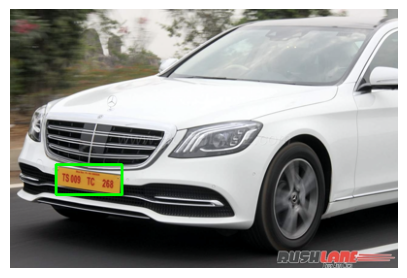

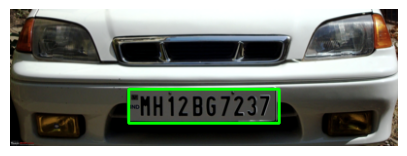

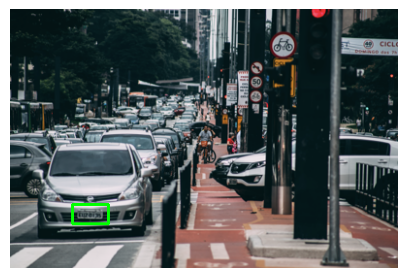

In [22]:
image_files = os.listdir(images_dir)
random.shuffle(image_files) # shuffle for the random output
show_yolo_images(images_dir, label_dir, image_files, max_images=3) # call the function

In [23]:
import yaml

# Define dataset config
data_config = {
    'train': '/content/datasets/cars_license_plate_new/train',
    'val': '/content/datasets/cars_license_plate_new/val',
    'test': '/content/datasets/cars_license_plate_new/test',  # optional
    'nc': 1,  # number of classes
    'names': ['license_plate']  # class names
}

# Save to yaml file
yaml_path = '/content/datasets/license_plate.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f, default_flow_style=False)

print(f"YAML file created at: {yaml_path}")


YAML file created at: /content/datasets/license_plate.yaml


In [24]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
model.train(data="/content/datasets/license_plate.yaml", epochs=50)
model.save("best.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/license_plate.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7,